In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import numpy.random as npr
import random
import kaplanmeier as km

## Data Preparation

In [2]:
path_verylow = '../Dataset/csv_Survival_Analysis/VeryLow.csv'
df_verylow = pd.read_csv(path_verylow, sep='\t')
path_low = '../Dataset/csv_Survival_Analysis/Low.csv'
df_low = pd.read_csv(path_low, sep='\t')
path_int = '../Dataset/csv_Survival_Analysis/Int.csv'
df_int = pd.read_csv(path_int, sep='\t')
path_high = '../Dataset/csv_Survival_Analysis/High.csv'
df_high = pd.read_csv(path_high, sep='\t')
path_veryhigh = '../Dataset/csv_Survival_Analysis/VeryHigh.csv'
df_veryhigh = pd.read_csv(path_veryhigh, sep='\t')

df_verylow

,Case ID,Number at Risk,Status,Survival Rate,Time (months)
0,E-H-117419,482,censored,1.000000,0.000000
1,E-H-105850,481,censored,1.000000,0.000000
2,E-H-105880,480,censored,1.000000,0.000000
3,E-H-110409,479,censored,1.000000,0.000000
4,E-H-110822,478,censored,1.000000,0.000000
...,...,...,...,...,...
477,E-H-116729,5,censored,0.329087,174.641096
478,E-H-105459,4,censored,0.329087,176.975343
479,E-H-105982,3,censored,0.329087,184.701370
480,E-H-105515,2,deceased,0.164543,191.276712


In [3]:
# Add a column with the risk group to each of the dataframes
df_verylow['Risk Group'] = 'Very Low'
df_low['Risk Group'] = 'Low'
df_int['Risk Group'] = 'Intermediate'
df_high['Risk Group'] = 'High'
df_veryhigh['Risk Group'] = 'Very High'

# Concatenate the dataframes
df_survival = pd.concat([df_verylow, df_low, df_int, df_high, df_veryhigh])

df_survival

,Case ID,Number at Risk,Status,Survival Rate,Time (months),Risk Group
0,E-H-117419,482,censored,1.000000,0.000000,Very Low
1,E-H-105850,481,censored,1.000000,0.000000,Very Low
2,E-H-105880,480,censored,1.000000,0.000000,Very Low
3,E-H-110409,479,censored,1.000000,0.000000,Very Low
4,E-H-110822,478,censored,1.000000,0.000000,Very Low
...,...,...,...,...,...,...
355,E-H-105678,5,censored,0.058110,77.786301,Very High
356,E-H-116517,4,deceased,0.043582,79.923288,Very High
357,E-H-105691,3,censored,0.043582,97.380822,Very High
358,E-H-105650,2,censored,0.043582,129.665753,Very High


In [4]:
# map censored values to 0 and decesead values to 1
df_survival['Status'] = df_survival['Status'].map({'censored': 0, 'deceased': 1})

df_survival

,Case ID,Number at Risk,Status,Survival Rate,Time (months),Risk Group
0,E-H-117419,482,0,1.000000,0.000000,Very Low
1,E-H-105850,481,0,1.000000,0.000000,Very Low
2,E-H-105880,480,0,1.000000,0.000000,Very Low
3,E-H-110409,479,0,1.000000,0.000000,Very Low
4,E-H-110822,478,0,1.000000,0.000000,Very Low
...,...,...,...,...,...,...
355,E-H-105678,5,0,0.058110,77.786301,Very High
356,E-H-116517,4,1,0.043582,79.923288,Very High
357,E-H-105691,3,0,0.043582,97.380822,Very High
358,E-H-105650,2,0,0.043582,129.665753,Very High


## Revised Coin Toss Mechanism

In [5]:
def revised_coin_toss(category, n, p):

    '''
    category: IPSS-R category, value to be privatized
    n: number of categories (not used in this function, used to compute the epsilon)
    p: coin bias
    '''
    # check if the possible epsilon is negative
    def verify_epsilon(p,n):
        return np.log((n*p+1-p)/(n-1-n*p+p))
        if epsilon <= 0:
            print('epsilon is negative for such values of p and n')
            exit()
        else:
            return epsilon
    
    # compute epsilon
    epsilon = verify_epsilon(p,n)

    # toss a coin H with probability p, T with probability 1-p
    coin = np.random.choice(['H', 'T'], p=[p, 1-p])

    # if coin is H, return the original value
    if coin == 'H':
        return category
    
    # if coin is T, return a random value from the n categories
    else:
        return random.choice(['Very Low', 'Low', 'Intermediate', 'High', 'Very High'])


## Survival Plot with Kaplan-Meier Estimator

### Real Scenario

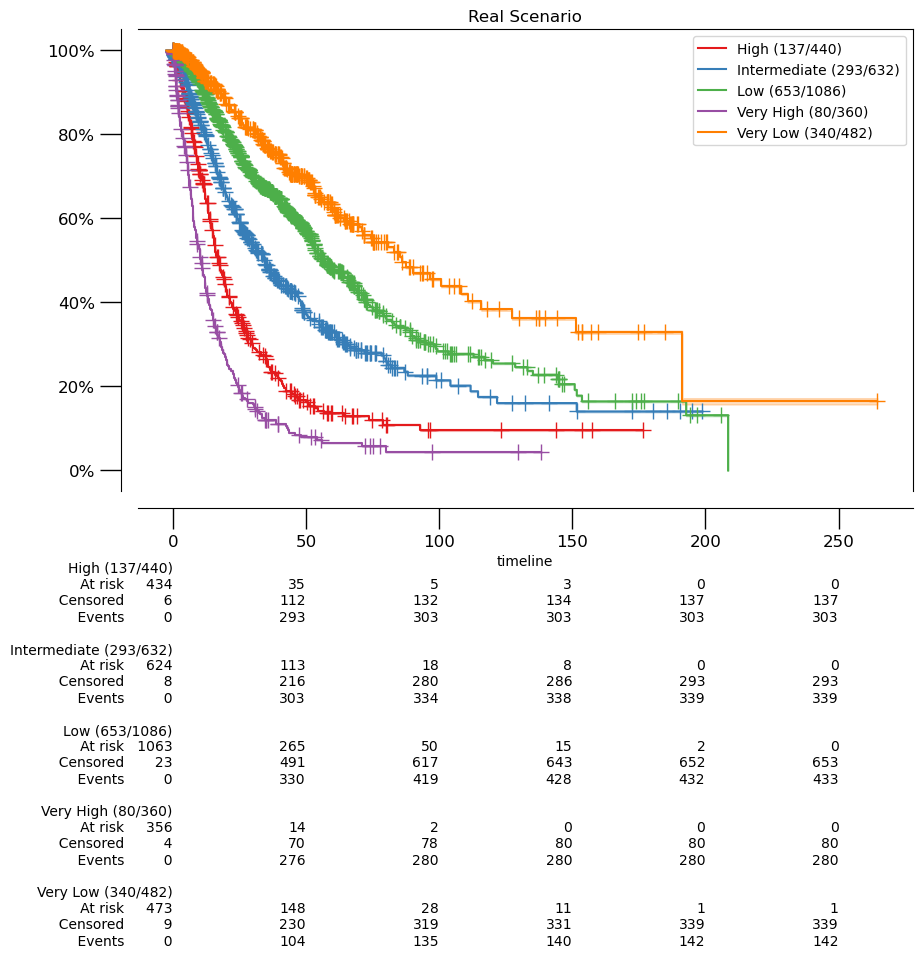

In [6]:
time_real_event = df_survival['Time (months)']
censoring_real_event = df_survival['Status']
y = df_survival['Risk Group']

# compute survival
km_real_scenario = km.fit(time_real_event, censoring_real_event, y)

# plot survival
km.plot(km_real_scenario, title='Real Scenario', y_percentage=True, width=10, height=6)

### Privatized Scenarios

#### Scenario 1: Fair Coin

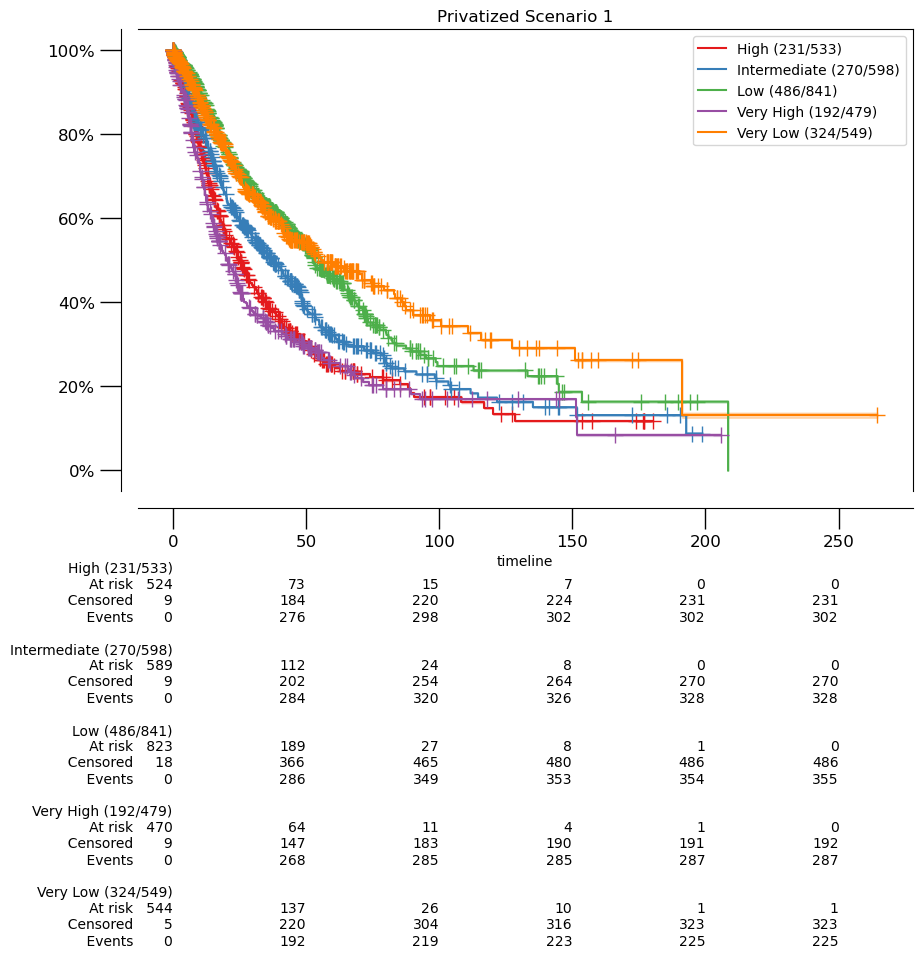

In [7]:
# set the coin bias
p1 = 0.5

# create a new column with the privatized values
df_survival['Privatized Risk Group'] = df_survival['Risk Group'].apply(lambda x: revised_coin_toss(x, len(df_survival['Risk Group'].unique()), p1))

time_real_event = df_survival['Time (months)']
censoring_real_event = df_survival['Status']
y = df_survival['Privatized Risk Group']

# compute survival
km_real_scenario = km.fit(time_real_event, censoring_real_event, y)

# plot survival
km.plot(km_real_scenario, title='Privatized Scenario 1', y_percentage=True, width=10, height=6)

#### Scenario 2: Changing $p$

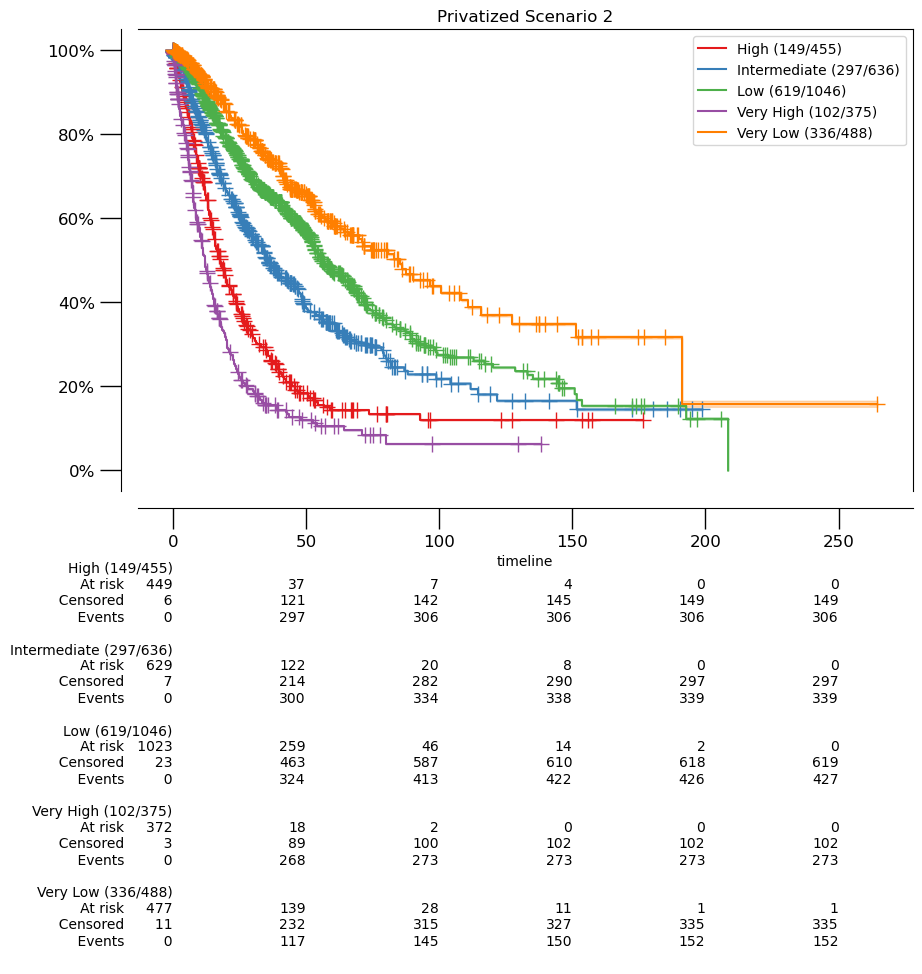

In [8]:
# set the coin bias
p2 = 0.9

# create a new column with the privatized values
df_survival['Privatized Risk Group'] = df_survival['Risk Group'].apply(lambda x: revised_coin_toss(x, len(df_survival['Risk Group'].unique()), p2))

time_real_event = df_survival['Time (months)']
censoring_real_event = df_survival['Status']
y = df_survival['Privatized Risk Group']

# compute survival
km_real_scenario = km.fit(time_real_event, censoring_real_event, y)

# plot survival
km.plot(km_real_scenario, title='Privatized Scenario 2', y_percentage=True, width=10, height=6)

#### Scenario 3: Minimum $p$

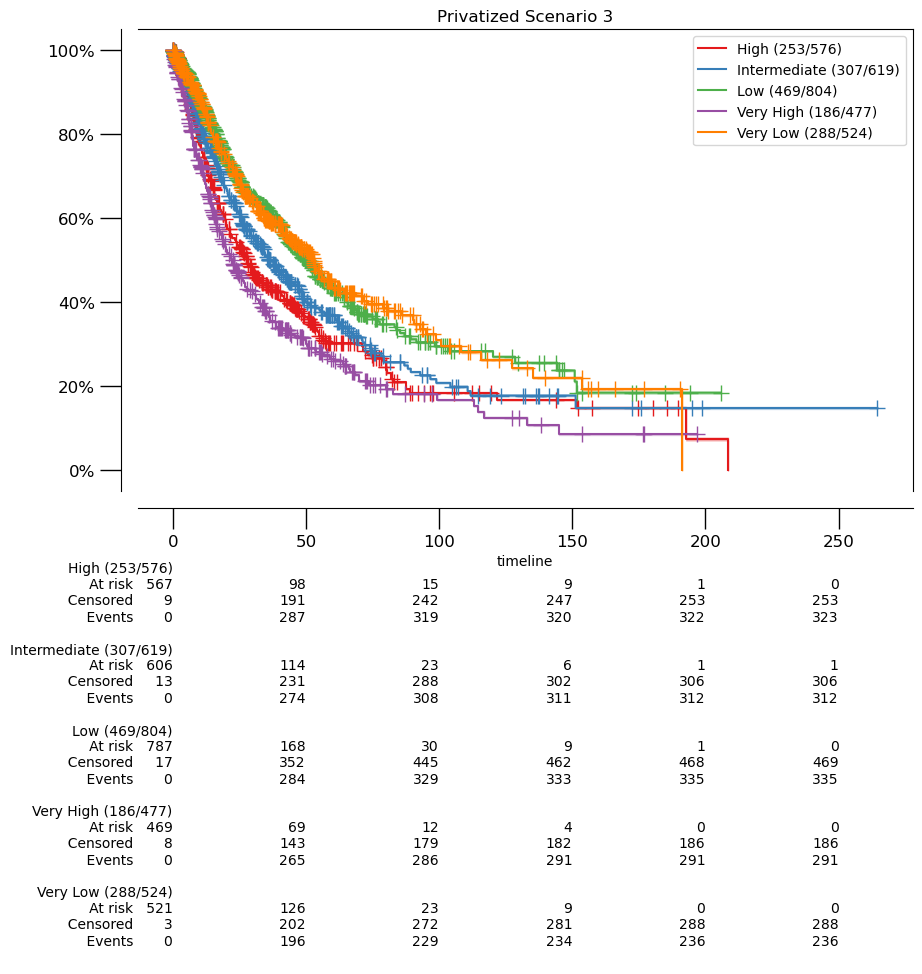

In [11]:
# set the coin bias
p3 = 0.4

# create a new column with the privatized values
df_survival['Privatized Risk Group'] = df_survival['Risk Group'].apply(lambda x: revised_coin_toss(x, len(df_survival['Risk Group'].unique()), p3))

time_real_event = df_survival['Time (months)']
censoring_real_event = df_survival['Status']
y = df_survival['Privatized Risk Group']

# compute survival
km_real_scenario = km.fit(time_real_event, censoring_real_event, y)

# plot survival
km.plot(km_real_scenario, title='Privatized Scenario 3', y_percentage=True, width=10, height=6)

### Epsilon computation

In [12]:
def compute_epsilon(p,n):
    return np.log((n*p+1-p)/(n-1-n*p+p))

print('epsilon for p1 = 0.5: ', compute_epsilon(p1, 5))
print('epsilon for p2 = 0.9: ', compute_epsilon(p2, 5))
print('epsilon for p3 = 0.4: ', compute_epsilon(p3, 5))

epsilon for p1 = 0.5:  0.4054651081081644
epsilon for p2 = 0.9:  2.4423470353692043
epsilon for p3 = 0.4:  0.08004270767353656
